In [ ]:
# ===========================================================
# FraudFinder - EDA Notebook
# notebooks/1_eda.ipynb
# This jupyter notebook helps us perform EDA on the dataset.
# ===========================================================

## 1. Import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams["figure.figsize"] = (8, 4)
sns.set_style("whitegrid")

## 2. Load data

In [13]:
data_path = os.path.join("..", "data", "raw", "fraud_oracle.csv")
df = pd.read_csv(data_path)
target='FraudFound_P'
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Basic Overview

In [14]:
df.shape
df.info()
df.describe(exclude="object").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


## 3. Target Distribution

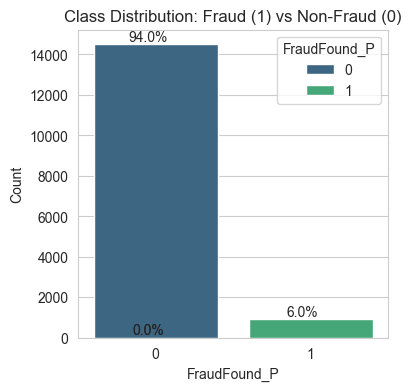

In [15]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="FraudFound_P", hue='FraudFound_P', data=df, palette="viridis")
plt.title("Class Distribution: Fraud (1) vs Non-Fraud (0)")
plt.xlabel("FraudFound_P")
plt.ylabel("Count")

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="bottom")
plt.show()

## 4. Missing values

In [16]:
missing = df.isnull().mean().sort_values(ascending=False)
missing_nonzero = missing[missing > 0]
if not missing_nonzero.empty:
    missing_nonzero.plot(kind="bar")
    plt.title("Missing Value Percentage")
    plt.show()
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


## 5. Drop ID / leakage columns

In [17]:
ID_COLS = [
    "PolicyNumber",
    "RepNumber",
    "ClaimNumber",
    "CustomerID"
]

df = df.drop(columns=[c for c in ID_COLS if c in df.columns])

## 6. Categorical vs Numerical

In [18]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(exclude="object").columns.tolist()

print("Categorical columns:", len(cat_cols))
print("Numerical columns:", len(num_cols))

Categorical columns: 24
Numerical columns: 7


## 7. Fraud rate by categorical features

In [19]:
for col in cat_cols[:8]:  # limit for readability
    fraud_rate = (
        df.groupby(col)[target]
        .mean()
        .sort_values(ascending=False)
    )
    print(f"\nFraud rate by {col}")
    display(fraud_rate)


Fraud rate by Month


Month
Mar    0.075000
Aug    0.074534
May    0.068764
Feb    0.064771
Apr    0.062500
Jan    0.061658
Sep    0.061290
Jun    0.060560
Oct    0.053640
Dec    0.048249
Jul    0.047733
Nov    0.038301
Name: FraudFound_P, dtype: float64


Fraud rate by DayOfWeek


DayOfWeek
Sunday       0.069914
Saturday     0.066599
Friday       0.062986
Monday       0.061162
Thursday     0.055223
Wednesday    0.053265
Tuesday      0.052174
Name: FraudFound_P, dtype: float64


Fraud rate by Make


Make
Mecedes      0.250000
Accura       0.125000
Saturn       0.103448
Saab         0.101852
Ford         0.073333
Mercury      0.072289
BMW          0.066667
Honda        0.063906
Toyota       0.059596
Chevrolet    0.055919
Pontiac      0.055512
Mazda        0.052251
Nisson       0.033333
VW           0.028269
Dodge        0.018349
Jaguar       0.000000
Lexus        0.000000
Ferrari      0.000000
Porche       0.000000
Name: FraudFound_P, dtype: float64


Fraud rate by AccidentArea


AccidentArea
Rural    0.083229
Urban    0.057155
Name: FraudFound_P, dtype: float64


Fraud rate by DayOfWeekClaimed


DayOfWeekClaimed
Saturday     0.078740
Friday       0.065679
Wednesday    0.063707
Tuesday      0.058667
Sunday       0.057692
Monday       0.057493
Thursday     0.054135
0            0.000000
Name: FraudFound_P, dtype: float64


Fraud rate by MonthClaimed


MonthClaimed
Aug    0.081705
May    0.072289
Mar    0.071958
Apr    0.064516
Jan    0.063624
Sep    0.062802
Feb    0.060606
Jun    0.060325
Oct    0.054518
Jul    0.045714
Dec    0.042757
Nov    0.035798
0      0.000000
Name: FraudFound_P, dtype: float64


Fraud rate by Sex


Sex
Male      0.062923
Female    0.043388
Name: FraudFound_P, dtype: float64


Fraud rate by MaritalStatus


MaritalStatus
Widow       0.085714
Married     0.060141
Single      0.059351
Divorced    0.039474
Name: FraudFound_P, dtype: float64

## 8. Numerical distributions

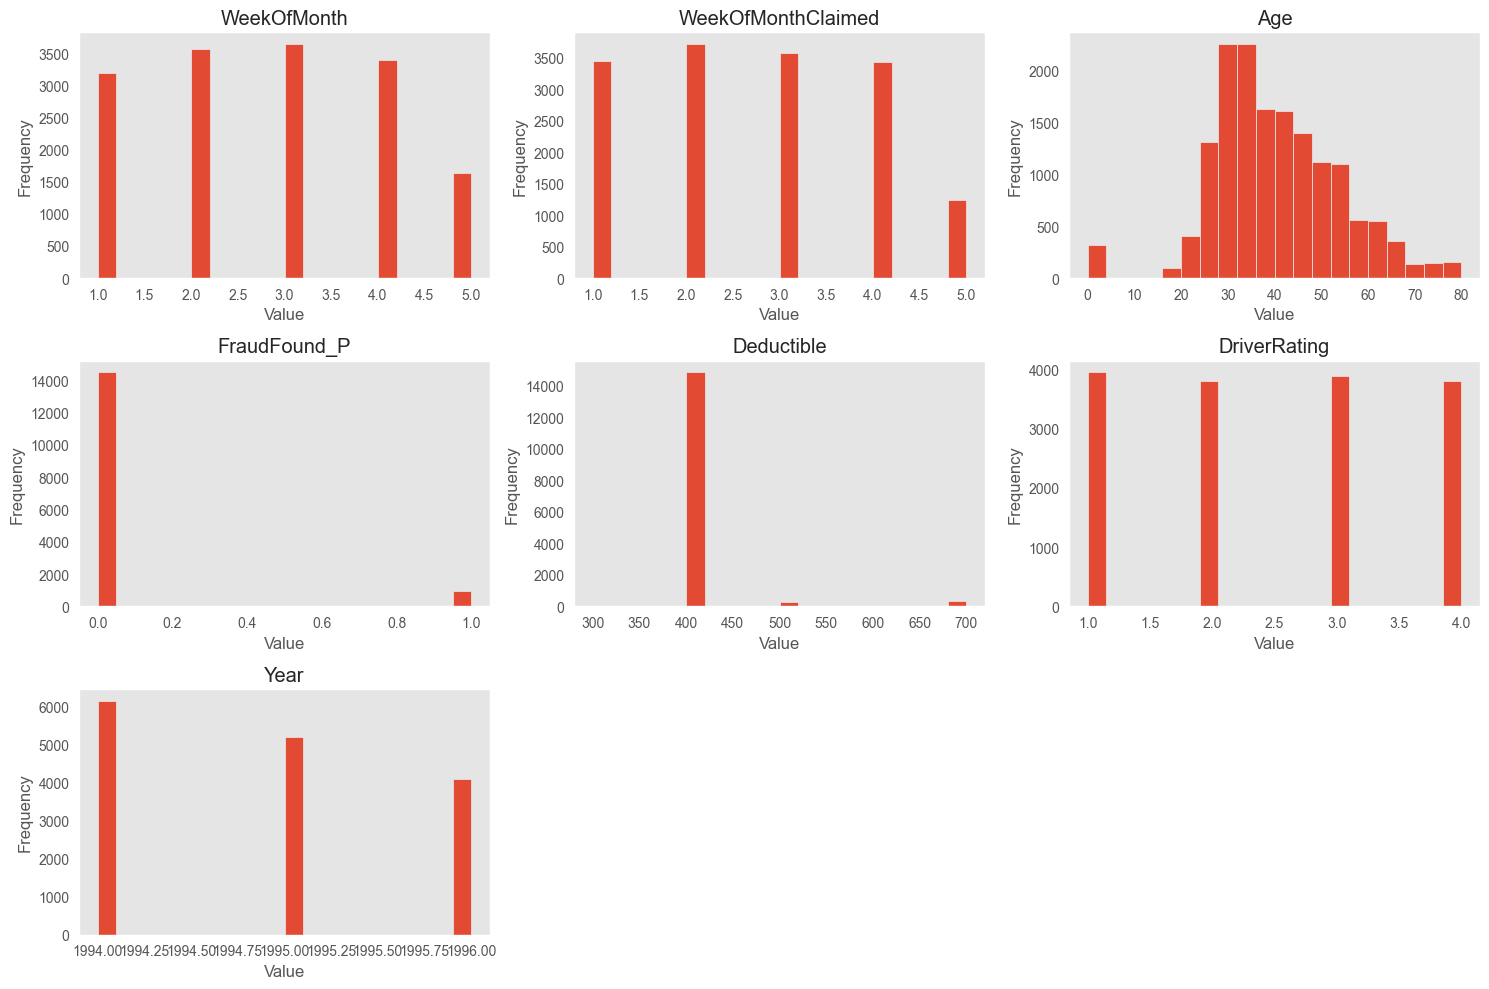

In [20]:
plt.style.use('ggplot')  # optional: try 'ggplot' or 'fivethirtyeight'
axes = df[num_cols].hist(bins=20, figsize=(15, 10))

# Customize each subplot
for ax in axes.flatten():
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Value")
    ax.grid(False)  # cleaner look

plt.tight_layout()  # adjust spacing
plt.show()


## 9. Numerical features vs fraud

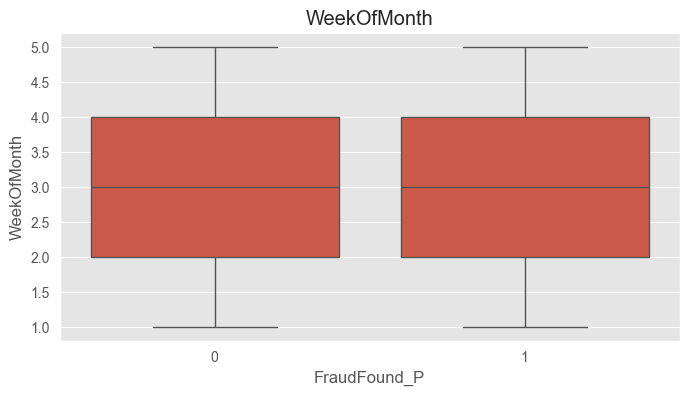

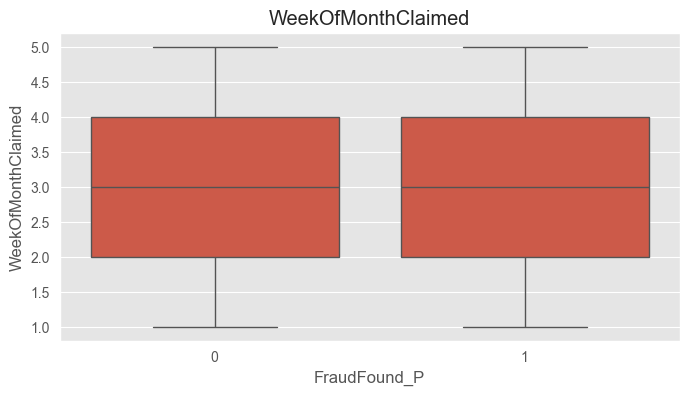

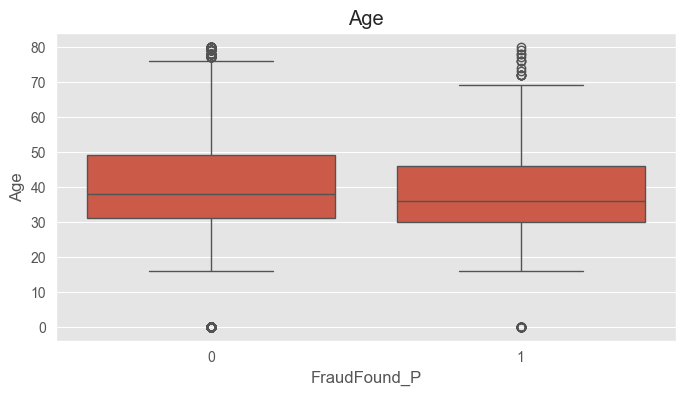

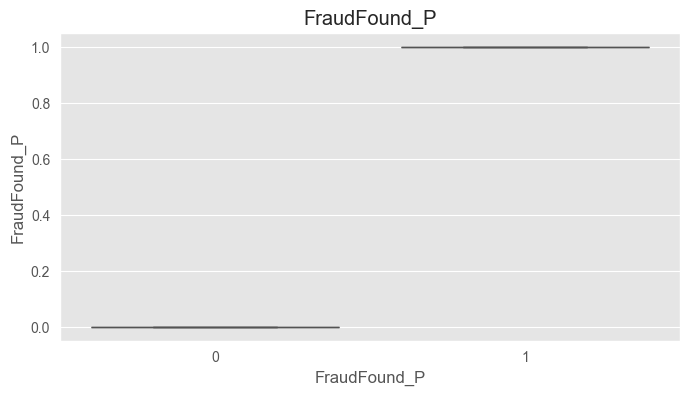

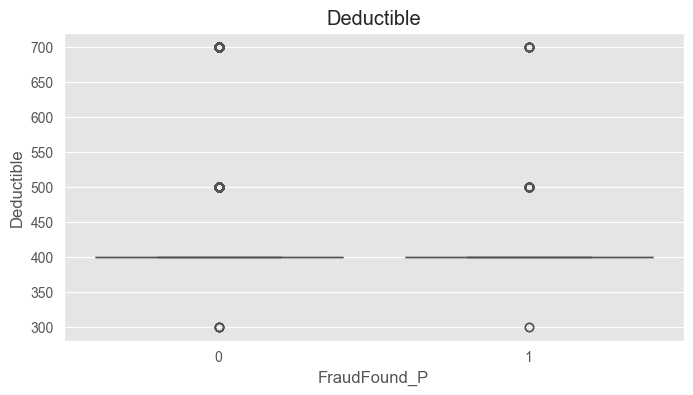

In [24]:
for col in num_cols[:5]:
    sns.boxplot(x=target, y=col, data=df)
    plt.title(col)
    plt.show()

## 10. Correlation (numerical only)

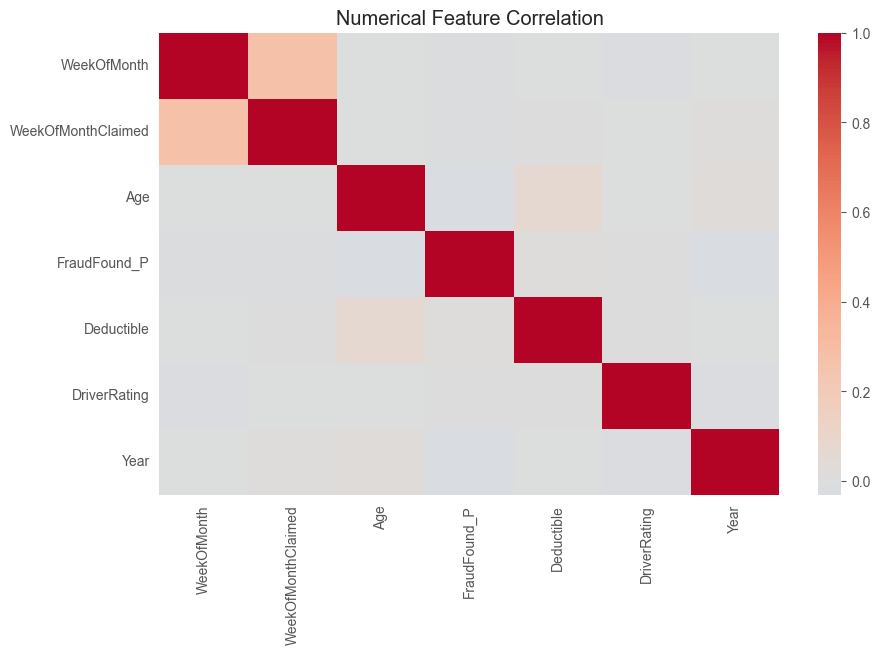

In [25]:
corr = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Numerical Feature Correlation")
plt.show()

## 11. Save processed dataset

In [26]:
processed_path = os.path.join("..", "data", "processed", "processed.csv")
df.to_csv(processed_path, index=False)

print("Processed dataset saved to:", processed_path)


Processed dataset saved to: ..\data\processed\processed.csv
